# Presentation
## Specialization: Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from apyori import apriori
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import random_projection
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from mlxtend.plotting import plot_confusion_matrix
import math
import warnings
warnings.filterwarnings('ignore')

from utils import *
data_path = "../data/"

## Host Since Mapping

In [ ]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[['host_since']]
df = df.dropna()
df = host_year_only(df)
sort_year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

fig = plt.figure(figsize = (13, 5))
ax = sns.countplot(x="host_since", data=df, order = sort_year)
plt.title("Histogram of Host Since Distribution")
plt.xlabel("Year (2018-2021)")
plt.show()

# print(df['bathrooms_text'].unique())
# print(df['beds'].unique())
# print(df['amenities'][0])

## Superhost T/F Binary Classification

### 1. Host-Realted Features (KNN, Logistic Regression, Gradient Boosting Tree Classification)

Sample Size: 20141
KNN CV score: 0.7720332002311906
KNN Accuracy: 0.7833209233060313


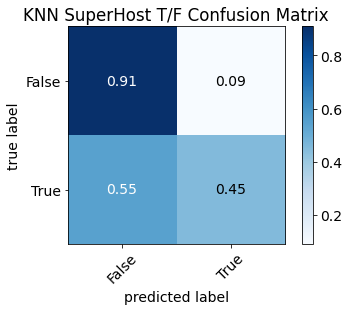

Logistic CV score: 0.7356007690688415
Logistic Accuracy: 0.7222635889798957


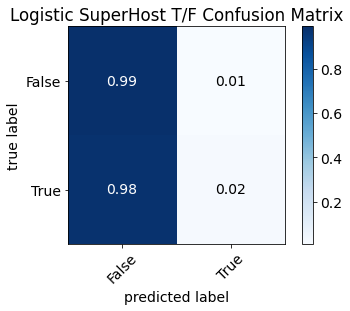

Gradient Boosting CV score: 0.7517375597837779
Gradient Boosting Accuracy: 0.7468354430379747


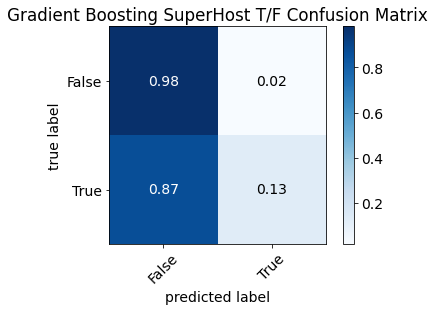

In [4]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', \
         'host_identity_verified', 'host_since', 'host_is_superhost']]
df = df.dropna()
print("Sample Size:", len(df))

df = df_binarization(df, 'host_has_profile_pic') # t/f -> 1/0
df = df_binarization(df, 'host_identity_verified') # t/f -> 1/0
df = host_nth_year(df)
x_raw = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',\
            'host_identity_verified', 'host_since']]
y_raw = df['host_is_superhost']
y_encode = y_binarization(y_raw) # t/f -> 1/0

x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40)

# knn
knn_model = KNeighborsClassifier()
CV = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')
print("KNN CV score:", CV.mean())
knn_model.fit(x, y) # get the model
y_pred = knn_model.predict(x_test) 
print ("KNN Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# logistic
logistic_model = LogisticRegression(solver='saga')
CV = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
print("Logistic CV score:", CV.mean())
logistic_model.fit(x, y) # get the model
y_pred = logistic_model.predict(x_test) 
print ("Logistic Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Logistic SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# gbt
gbc_model = GradientBoostingClassifier()
CV = cross_val_score(gbc_model, x, y, cv=5, scoring='accuracy')
print("Gradient Boosting CV score:", CV.mean())
gbc_model.fit(x, y) # get the model
y_pred = gbc_model.predict(x_test) 
print ("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'Gradient Boosting SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

### 2. Property-Related Features (KNN, Logistic Regression, Gradient Boosting Tree Classification)

Sample Size: 27608
KNN CV score: 0.7725255102589864
KNN Accuracy: 0.7680188337558855


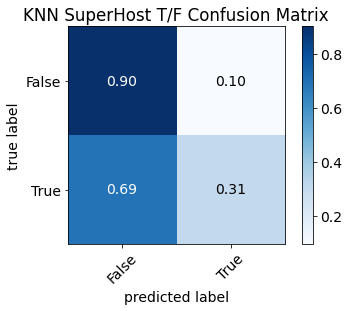

Logistic CV score: 0.7733407480645227
KNN Accuracy: 0.7705541470481709


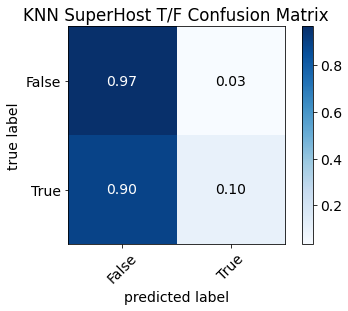

Gradient Boosting CV score: 0.8334237456356378
KNN Accuracy: 0.8391886997464687


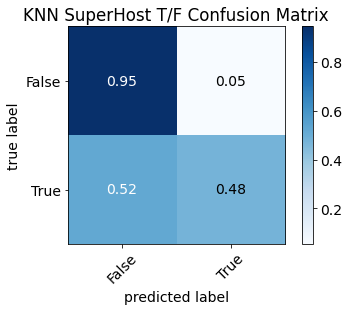

In [5]:
df = pd.read_csv(data_path + "listings_detail.csv") # load data

# columns will be used
df = df[['neighbourhood_group_cleansed', 'room_type', 'number_of_reviews',\
         'number_of_reviews_l30d', 'number_of_reviews_ltm', 'reviews_per_month',\
         'review_scores_rating', 'price', 'instant_bookable',\
         'host_is_superhost']]
df = df.dropna() # drop null
print("Sample Size:", len(df))

df= df_binarization(df, 'instant_bookable') # t/f -> 1/0
df = str_to_int(df, 'neighbourhood_group_cleansed') # string -> int mapping
df = str_to_int(df, 'room_type') # string -> int mapping
x_raw = df[['neighbourhood_group_cleansed', 'room_type', 'number_of_reviews',\
            'number_of_reviews_l30d', 'number_of_reviews_ltm', 'reviews_per_month',\
            'review_scores_rating', 'price', 'instant_bookable']]
y_raw = df['host_is_superhost']
y_encode = y_binarization(y_raw) # t/f -> 1/0

x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40) # train/test split

# knn
knn_model = KNeighborsClassifier()
CV = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')
print("KNN CV score:", CV.mean())
knn_model.fit(x, y) # get the model
y_pred = knn_model.predict(x_test) 
print ("KNN Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# logistic
logistic_model = LogisticRegression(solver='saga')
CV = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
print("Logistic CV score:", CV.mean())
logistic_model.fit(x, y) # get the model
y_pred = logistic_model.predict(x_test) 
print ("Logistic Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

# gbt
gbc_model = GradientBoostingClassifier()
CV = cross_val_score(gbc_model, x, y, cv=5, scoring='accuracy')
print("Gradient Boosting CV score:", CV.mean())
gbc_model.fit(x, y) # get the model
y_pred = gbc_model.predict(x_test) 
print ("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
plot = draw_matrix(y_test, y_pred, 'KNN SuperHost T/F Confusion Matrix' , ["False", "True"])
plot.show()

### 3. Host + Property-Related Features (KNN, Logistic Regression, Gradient Boosting Tree Classification)

In [ ]:
df = pd.read_csv(data_path + "listings_detail.csv") # load data

# columns will be used
df = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', \
         'host_identity_verified','neighbourhood_group_cleansed', 'room_type',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'reviews_per_month', 'review_scores_rating', 'price',\
         'instant_bookable', 'host_since', 'host_is_superhost']]
df = df.dropna() # drop null
print("Sample Size:", len(df))

df= df_binarization(df, 'host_has_profile_pic') # t/f -> 1/0
df= df_binarization(df, 'host_identity_verified') # t/f -> 1/0
df= df_binarization(df, 'instant_bookable') # t/f -> 1/0
df = str_to_int(df, 'neighbourhood_group_cleansed') # string -> int mapping
df = str_to_int(df, 'room_type') # string -> int mapping
df = host_nth_year(df)
x_raw = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', \
         'host_identity_verified','neighbourhood_group_cleansed', 'room_type',\
         'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm',\
         'reviews_per_month', 'review_scores_rating', 'price',\
         'instant_bookable', 'host_since']]
y_raw = df['host_is_superhost']
y_encode = y_binarization(y_raw) # t/f -> 1/0

# PCA (7 vs 11)
pca = [-1, 2, 4, 7, 9, 11] # -1 is without PCA
for p in pca:
    if p != -1:
        print("=====PCA: " + str(p) + "=====")
        transformer = decomposition.PCA(n_components=p).fit_transform(x_raw)
        x, x_test, y, y_test = train_test_split(transformer, y_encode, test_size=0.2, random_state=40) # train/test split
    else:
        x, x_test, y, y_test = train_test_split(x_raw, y_encode, test_size=0.2, random_state=40) # train/test split

    # knn
    knn_model = KNeighborsClassifier()
    CV = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')
    print("KNN CV score:", CV.mean())
    knn_model.fit(x, y) # get the model
    print("KNN Accuracy:", knn_model.score(x_test, y_test))

    # logistic
    logistic_model = LogisticRegression(solver='saga')
    CV = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
    print("Logistic CV score:", CV.mean())
    logistic_model.fit(x, y) # get the model
    print("Logistic Accuracy:", logistic_model.score(x_test, y_test))

    # gbt
    gbc_model = GradientBoostingClassifier()
    CV = cross_val_score(gbc_model, x, y, cv=5, scoring='accuracy')
    print("Gradient Boosting CV score:", CV.mean())
    gbc_model.fit(x, y) # get the model
    print("Gradient Boosting Accuracy:", gbc_model.score(x_test, y_test))

### 3-4. Linear Regression

In [ ]:
# price prediction with superhost, neighborhood, room_type, and reviews
df = pd.read_csv(data_path + "listings_detail.csv")
df.loc[(df.host_is_superhost == 't'),'host_is_superhost'] = 1
df.loc[(df.host_is_superhost == 'f'),'host_is_superhost'] = 0
df.loc[(df.neighbourhood_group_cleansed == 'Manhattan'),'neighbourhood_group_cleansed'] = 0
df.loc[(df.neighbourhood_group_cleansed == 'Brooklyn'),'neighbourhood_group_cleansed'] = 1
df.loc[(df.neighbourhood_group_cleansed == 'Queens'),'neighbourhood_group_cleansed'] = 2
df.loc[(df.neighbourhood_group_cleansed == 'Staten Island'),'neighbourhood_group_cleansed'] = 3
df.loc[(df.neighbourhood_group_cleansed == 'Bronx'),'neighbourhood_group_cleansed'] = 4
df.loc[(df.room_type == 'Entire home/apt'),'room_type'] = 0
df.loc[(df.room_type == 'Private room'),'room_type'] = 1
df.loc[(df.room_type == 'Hotel room'),'room_type'] = 2
df.loc[(df.room_type == 'Shared room'),'room_type'] = 3

df = df[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'review_scores_rating', 'review_scores_rating', 'price']]
df = df.dropna()
x_raw = df[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'review_scores_rating']]
y_raw = df['price']
x, x_test, y, y_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=40)

linear_model = LinearRegression()
CV = cross_val_score(linear_model, x, y, cv=5, scoring='r2')
print("CV score:", CV.mean())

linear_model.fit(x, y) # get the model
print("r2:", linear_model.score(x_test, y_test))

### 3-5. Gradient Boosting Tree

In [ ]:
# price prediction with superhost, neighborhood, room_type, and reviews
df = pd.read_csv(data_path + "listings_detail.csv")
df.loc[(df.host_is_superhost == 't'),'host_is_superhost'] = 1
df.loc[(df.host_is_superhost == 'f'),'host_is_superhost'] = 0
df = str_to_int(df, 'neighbourhood_group_cleansed')
df = str_to_int(df, 'room_type')

df = df[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'review_scores_rating', 'review_scores_rating', 'price']]
df = df.dropna()
x_raw = df[['host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'review_scores_rating']]
y_raw = df['price']
x, x_test, y, y_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=40)

gbr_model = GradientBoostingRegressor()
CV = cross_val_score(gbr_model, x, y, cv=5, scoring='r2')
print("CV score:", CV.mean())

gbr_model.fit(x, y) # get the model
print("r2:", gbr_model.score(x_test, y_test))